In [1]:
import os

os.environ['PROJ_LIB'] = '/opt/tljh/user/share/proj'

In [4]:
import requests

url="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
output_file = 'counties-fips.json'

In [6]:
response = requests.get(url)

if response.status_code == 200:
    with open(output_file, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded as '{output_file}'")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded as 'counties-fips.json'


In [7]:
import geopandas as gpd

In [8]:
import pandas as pd

In [9]:
gdf = gpd.read_file("counties-fips.json")

In [10]:
gdf.shape

(3221, 8)

In [11]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [12]:
gdf.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."


In [13]:
gdf.dtypes

id              object
GEO_ID          object
STATE           object
COUNTY          object
NAME            object
LSAD            object
CENSUSAREA     float64
geometry      geometry
dtype: object

<Axes: >

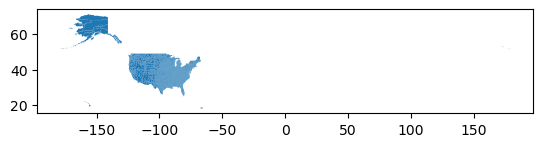

In [14]:
gdf.plot()

In [15]:
gdf.shape

(3221, 8)

In [16]:
gdf.columns

Index(['id', 'GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA',
       'geometry'],
      dtype='object')

In [17]:
df = pd.read_excel('PovertyEstimates.xlsx', 'PovertyEstimates', skiprows=4)

In [18]:
df.head()

,FIPS_Code,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_ 2013,POVALL_2021,CI90LBALL_2021,CI90UBALL_2021,...,CI90UB517P_2021,MEDHHINC_2021,CI90LBINC_2021,CI90UBINC_2021,POV04_2021,CI90LB04_2021,CI90UB04_2021,PCTPOV04_2021,CI90LB04P_2021,CI90UB04P_2021
0,0,US,United States,NaN,NaN,NaN,NaN,41393176.0,41149497.0,41636855.0,...,16.3,69717.0,69583.0,69851.0,3349149.0,3299669.0,3398629.0,18.3,18.0,18.6
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,800848.0,782169.0,819527.0,...,22.5,53990.0,53218.0,54762.0,71220.0,66888.0,75552.0,25.1,23.6,26.6
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6296.0,4772.0,7820.0,...,20.4,66444.0,60061.0,72827.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,25526.0,21599.0,29453.0,...,18.5,65658.0,60723.0,70593.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,5089.0,3773.0,6405.0,...,44.6,38649.0,34308.0,42990.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
gdf.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."


In [20]:
df['fips'] = df.FIPS_Code.astype(str).str.zfill(5)

In [21]:
df.fips

0       00000
1       01000
2       01001
3       01003
4       01005
        ...  
3190    56037
3191    56039
3192    56041
3193    56043
3194    56045
Name: fips, Length: 3195, dtype: object

In [22]:
gdf1 = gdf.merge(df, left_on='id', right_on='fips', how='left')

In [23]:
gdf1.shape

(3221, 43)

In [24]:
gdf.shape

(3221, 8)

In [26]:
gdf1.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,FIPS_Code,Stabr,...,MEDHHINC_2021,CI90LBINC_2021,CI90UBINC_2021,POV04_2021,CI90LB04_2021,CI90UB04_2021,PCTPOV04_2021,CI90LB04P_2021,CI90UB04P_2021,fips
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",1001.0,AL,...,66444.0,60061.0,72827.0,NaN,NaN,NaN,NaN,NaN,NaN,01001
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",1009.0,AL,...,56894.0,52632.0,61156.0,NaN,NaN,NaN,NaN,NaN,NaN,01009
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",1017.0,AL,...,45447.0,40729.0,50165.0,NaN,NaN,NaN,NaN,NaN,NaN,01017
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",1021.0,AL,...,55142.0,49687.0,60597.0,NaN,NaN,NaN,NaN,NaN,NaN,01021
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",1033.0,AL,...,53341.0,48729.0,57953.0,NaN,NaN,NaN,NaN,NaN,NaN,01033


In [27]:
gdf1.columns

Index(['id', 'GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA',
       'geometry', 'FIPS_Code', 'Stabr', 'Area_name',
       'Rural-urban_Continuum_Code_2003', 'Urban_Influence_Code_2003',
       'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_ 2013',
       'POVALL_2021', 'CI90LBALL_2021', 'CI90UBALL_2021', 'PCTPOVALL_2021',
       'CI90LBALLP_2021', 'CI90UBALLP_2021', 'POV017_2021', 'CI90LB017_2021',
       'CI90UB017_2021', 'PCTPOV017_2021', 'CI90LB017P_2021',
       'CI90UB017P_2021', 'POV517_2021', 'CI90LB517_2021', 'CI90UB517_2021',
       'PCTPOV517_2021', 'CI90LB517P_2021', 'CI90UB517P_2021', 'MEDHHINC_2021',
       'CI90LBINC_2021', 'CI90UBINC_2021', 'POV04_2021', 'CI90LB04_2021',
       'CI90UB04_2021', 'PCTPOV04_2021', 'CI90LB04P_2021', 'CI90UB04P_2021',
       'fips'],
      dtype='object')

In [28]:
gdf.columns

Index(['id', 'GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA',
       'geometry'],
      dtype='object')

In [29]:
ca = gdf1[gdf1.STATE=='06']

In [30]:
ca.shape

(58, 43)

<Axes: >

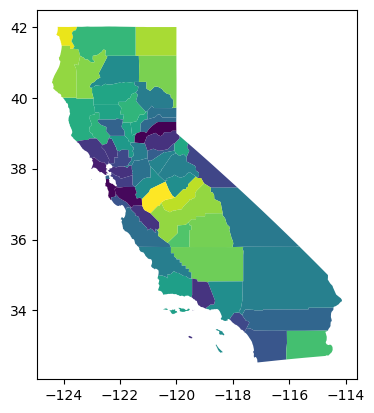

In [31]:
ca.plot(column='PCTPOVALL_2021')